# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
data=pd.read_csv('emails.csv',delimiter=',')

In [3]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
data.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 67.2+ KB


In [11]:
ham=data[data['spam']==0]
spam=data[data['spam']==1]

In [12]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [13]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [14]:
print('spam percentage: ',len(spam)/len(data['spam'])*100)

spam percentage:  23.88268156424581


# Visualising Data

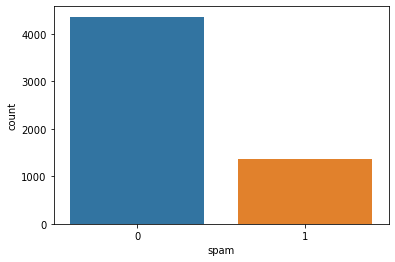

In [15]:
sns.countplot(x=data['spam'],label='count spam vs count')

# Dividing Data/Converting Data

In [78]:
output=data['spam'].values

In [79]:
output

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

In [81]:
vectorizer= CountVectorizer()
spamham_convertor= vectorizer.fit_transform(data['text'])

In [82]:
spamham_convertor.shape

(5728, 37303)

In [83]:
from sklearn.naive_bayes import MultinomialNB

In [84]:
NB_classifier=MultinomialNB()
NB_classifier.fit(spamham_convertor,output)

MultinomialNB()

# Training Model

In [88]:
x=spamham_convertor
y=output

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y)


In [91]:
NB_classifier.fit(x_train,y_train)

MultinomialNB()

# Predicting

In [118]:
from sklearn.metrics import classification_report, confusion_matrix

# For Training Data

In [93]:
y_pred_train=NB_classifier.predict(x_train)

In [94]:
y_pred_train

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

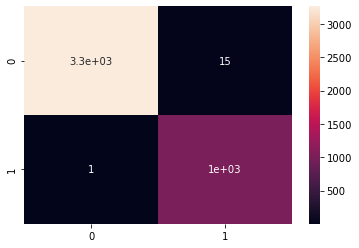

In [95]:
cm= confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm,annot=True)

In [117]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3279
           1       0.99      1.00      0.99      1017

    accuracy                           1.00      4296
   macro avg       0.99      1.00      0.99      4296
weighted avg       1.00      1.00      1.00      4296



# For Testing Data

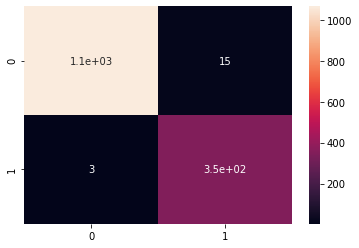

In [96]:
y_pred_test=NB_classifier.predict(x_test)
cm= confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm,annot=True)

In [97]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1081
           1       0.96      0.99      0.97       351

    accuracy                           0.99      1432
   macro avg       0.98      0.99      0.98      1432
weighted avg       0.99      0.99      0.99      1432



# Testing the Model

In [98]:
test=['Free money!!! kindly share your bank details']

In [99]:
test_vectorizer=vectorizer.transform(test)

In [100]:
test_vectorizer.shape

(1, 37303)

In [133]:
predict=NB_classifier.predict(test_vectorizer)
if predict==1:
    print('It is a Spam!!!!!')
else:
    print('It is Not a Spam.')

It is a Spam!!!!!
